In [1]:
import skewnormal as sn
import skewnfit as sf_n
import CentralStreamingModel.biskewt.skewtfit as sf

import CentralStreamingModel.biskewt.skewt as st

import matplotlib.pyplot as plt
import numpy as np
from CentralStreamingModel.utils.read_probabilities import VD

In [9]:
boxsize = 2000
box = 1
snapshot  =20

measured = VD(box, boxsize, snapshot)


In [10]:
popt_t, pcov_t = sf.radial_tangential_read_skewtfit(boxsize, box, 
                                           snapshot,False)

/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:15: RuntimeWarning: invalid value encountered in double_scalars
  prefactor = gamma((dof+2)/2)/np.pi/dof/gamma(dof/2)/determinant**0.5
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:17: RuntimeWarning: invalid value encountered in power
  postfactor = (1. + Q/dof)**(-(dof + 2.)/2.)
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:24: RuntimeWarning: invalid value encountered in sqrt
  return alpha * ( (v[:,1] - vr_c) / np.sqrt(w_r)) * ((dof + 2)/(Q + dof)) ** 0.5
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_inf

In [3]:
popt, pcov = sf_n.radial_tangential_read_skewnfit(boxsize, box, 
                                           snapshot)

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [11]:
v_r = measured.v.r
v_t = measured.v.t

r = np.arange(0.5, 100, 1.)

v = np.array(np.meshgrid(v_r, v_t)).T.reshape(-1,2)

In [69]:
rbin = 40
pdf_n = sn.skewnormal(v, 20,10,popt_t[rbin,2],-1.3).reshape(v_r.shape[0],
                                           v_t.shape[0])

pdf_t = st.skewt(v, *popt_t[rbin]).reshape(v_r.shape[0],
                                           v_t.shape[0])

In [70]:
popt_t[rbin]

array([25.75912403, 10.78539399,  2.38517902, -1.23968829, 12.71696787])

/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


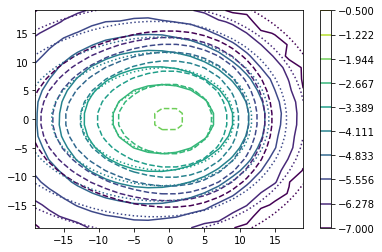

In [71]:
levels = np.linspace(-7., -0.5, 10)
plt.contour(v_t, v_r, np.log10(measured.jointpdf[rbin]),
            levels= levels)
plt.contour(v_t, v_r, np.log10(pdf_n), levels = levels,
           linestyles='dashed')
plt.contour(v_t, v_r, np.log10(pdf_t), levels = levels,
           linestyles='dotted')


plt.colorbar()

(-10, 10)

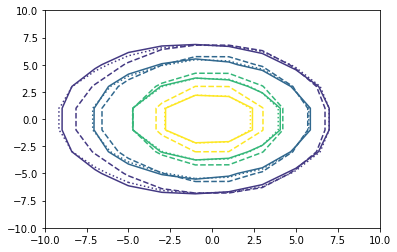

In [72]:
levels = [0., 0.0015, 0.003, 0.006, 0.009]
plt.contour(v_t, v_r, (measured.jointpdf[rbin]),
           levels=levels)
plt.contour(v_t, v_r, (pdf_n), levels = levels,
           linestyles='dashed')
plt.contour(v_t, v_r, (pdf_t), levels = levels,
           linestyles='dotted')
plt.xlim(-10,10)

plt.ylim(-10,10)
